In [168]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
from sklearn.cluster import KMeans
from sklearn import decomposition
import pandas as pd
import seaborn as sns 
import math



penguins = sns.load_dataset('penguins')


df = pd.DataFrame(data = penguins)

#Удаляем ненулевые строки 
#df = df[~np.isnan(df.bill_length_mm) ]
df=df.dropna()

penguins=penguins.dropna()
species=penguins['species'].values
species=pd.factorize(species)
species = species[0]

#Удаляем первый столбец 'species'
df = df.drop(df.columns[0],axis = 1)


display(df)



#fig,ax = plt.subplots(figsize = (7,7))
#sns.heatmap(df.corr(method = 'pearson'),ax=ax, annot = True, fmt = '.2f')

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [122]:
#Факторизуем (столбцы со стоковыми переменными изменяем на столбцы с численными переменными)

df[['island','sex']] = df[['island','sex']].apply(lambda x: pd.factorize(x)[0])
display(df)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,1,47.2,13.7,214.0,4925.0,1
340,1,46.8,14.3,215.0,4850.0,1
341,1,50.4,15.7,222.0,5750.0,0
342,1,45.2,14.8,212.0,5200.0,1


## [PCA] -> [K-Means] -> [Displaying results]

In [123]:
pca=decomposition.PCA(2)
pca.fit(df)

#explayned_variance = pca.explayned_variance_

PCA(n_components=2)

In [124]:
transformed_df=pca.transform(df)
print(transformed_df)

[[-4.57324711e+02  1.33713567e+01]
 [-4.07252109e+02  9.18475392e+00]
 [-9.57044553e+02 -8.14861258e+00]
 [-7.57115689e+02 -1.85752703e+00]
 [-5.57176935e+02  3.41162241e+00]
 [-5.82309215e+02  1.13788330e+01]
 [ 4.67772514e+02  1.47414731e+01]
 [-1.00723221e+03  3.03929163e+00]
 [-4.07183861e+02  5.10030024e+00]
 [ 1.92832099e+02  9.19077768e+00]
 [-5.07266957e+02  9.51803616e+00]
 [-7.57076947e+02 -4.40896596e+00]
 [ 2.92836574e+02  9.14757782e+00]
 [-8.82245086e+02  5.32523119e+00]
 [-7.15866987e+00  6.21688510e+00]
 [-8.07392789e+02  1.48325419e+01]
 [-6.07327054e+02  1.23954406e+01]
 [-4.07223185e+02  7.65077913e+00]
 [-2.57291848e+02  1.29649633e+01]
 [-4.07345753e+02  1.50555457e+01]
 [-4.07255629e+02  9.70299595e+00]
 [-6.57263537e+02  7.84520047e+00]
 [-1.00715915e+03 -1.46978189e+00]
 [-1.05739208e+03  1.27861725e+01]
 [-2.57359536e+02  1.70168378e+01]
 [-9.57304902e+02  8.01084136e+00]
 [-3.07396174e+02  1.90923253e+01]
 [-9.07160435e+02 -5.41601749e-01]
 [-3.07291118e+02  1

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


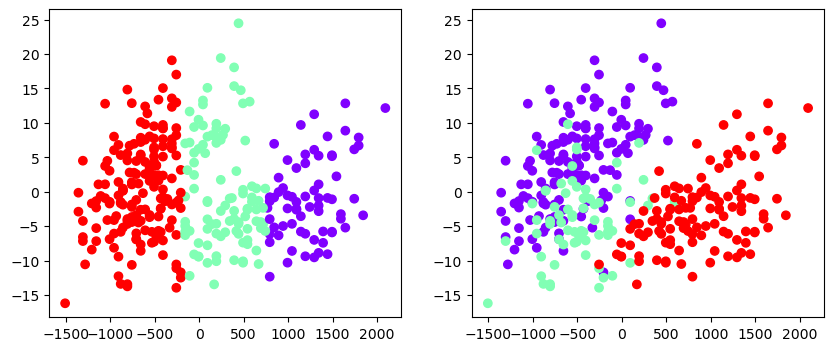

In [133]:
k_means=KMeans(n_clusters=3).fit(transformed_df)
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(121)
plt.scatter(transformed_df[:,0],transformed_df[:,1],c=k_means.labels_,marker='o',cmap='rainbow')
ax=fig.add_subplot(122)
plt.scatter(transformed_df[:,0],transformed_df[:,1],c=species,marker='o',cmap='rainbow')

## [K-Means]->[PCA]->[Displaying results]

In [134]:
k_means_k=KMeans(n_clusters=3).fit(df)
df['labels']=k_means_k.labels_
df

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,labels
0,0,39.1,18.7,181.0,3750.0,0,0
1,0,39.5,17.4,186.0,3800.0,1,0
2,0,40.3,18.0,195.0,3250.0,1,0
4,0,36.7,19.3,193.0,3450.0,1,0
5,0,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...,...
338,1,47.2,13.7,214.0,4925.0,1,2
340,1,46.8,14.3,215.0,4850.0,1,2
341,1,50.4,15.7,222.0,5750.0,0,1
342,1,45.2,14.8,212.0,5200.0,1,1


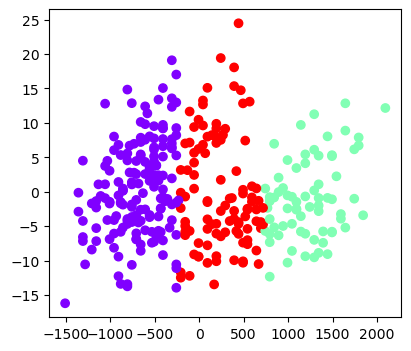

In [167]:
pca_k=decomposition.PCA(2)
pca_k.fit(df)
trans_ds=pca_k.transform(df)

fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(121)
plt.scatter(trans_ds[:,0],trans_ds[:,1],c=k_means_k.labels_,marker='o',cmap='rainbow')